<center>
    <h1>Buying Happiness</h1>
    <h2>Using Word2Vec to Turn Feelings Into Trades</h2>
    <img src="./images/comedy_tragedy.png" alt="Happiness" style="width: 400px;">
    <h4>Max Margenot</h4>
    <h4>Lead Data Scientist at Quantopian</h4>
</center>

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*

# Background

* Me

# Unstructured Data

Key source of "alpha"

# Natural Language Processing (NLP)

Computer science and linguistics tools to interpret human language and text

Allows us to quantify unstructured text

# Data Processing

* Stopwords
* Stemming
* Tokenization

# Feature Generation

## Bag of Words

### Unigrams

In [13]:
my_phrases = ['Show me the alpha', 'Carthago delenda est',]
[phrase.split(' ') for phrase in my_phrases]

[['Show', 'me', 'the', 'alpha'], ['Carthago', 'delenda', 'est']]

### Bigrams

In [10]:
[word for phrase 
 in my_phrases for word
     in zip(phrase.split(' ')[:-1], phrase.split(' ')[1:])]

[('Show', 'me'),
 ('me', 'the'),
 ('the', 'alpha'),
 ('Carthago', 'delenda'),
 ('delenda', 'est')]

# Feature Generation

## Word Embeddings

In [3]:
import gensim
w2v = gensim.models.Word2Vec.load('../../sensitivipy/d2v')

In [9]:
print(w2v.wv['sad'])

[ -1.89863455e+00  -1.54665136e+00  -2.23204970e+00  -1.30877733e+00
  -2.30061579e+00  -1.70134628e+00   1.83337653e+00  -2.08741140e+00
   3.23724604e+00   1.26184821e+00  -9.99662220e-01  -4.37552959e-01
   4.40503418e-01   1.19143569e+00  -2.29179478e+00  -1.86814177e+00
   3.11535645e+00   1.62474096e+00   2.66866231e+00   2.83645630e+00
  -1.28488052e+00   1.35040748e+00   1.01865172e+00  -4.80658680e-01
   4.23388511e-01  -1.65452003e+00   9.91536558e-01   2.40602851e+00
  -7.76076317e-01   1.94842303e+00   7.72831738e-01   7.38338292e-01
  -2.83442521e+00   6.60653114e-01   1.49878132e+00   6.51400387e-01
  -2.40639806e+00  -1.07167780e+00  -1.02165806e+00   9.60173905e-01
   2.21353650e+00  -1.42129743e+00  -9.27708030e-01  -3.88164580e-01
   1.46669912e+00   8.52385104e-01   5.12198329e-01  -4.31529015e-01
   2.94047624e-01   1.53495061e+00   2.58021164e+00  -5.14630191e-02
  -1.65423024e+00   1.98876739e+00  -3.05596733e+00   4.68582273e-01
  -7.30318785e-01  -2.12546796e-01

In [231]:
import pandas as pd
#wv_df = pd.DataFrame.from_dict({k : w2v.wv[k] for k in w2v.wv.vocab.keys()}, orient='index')
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaled_wv_df = StandardScaler().fit_transform(wv_df)
clustered_wv_df = DBSCAN(eps=0.3, min_samples=5, metric='cosine').fit(scaled_wv_df)
#clustered_wv_df = DBSCAN(eps=0.2, min_samples=3, metric='cosine').fit(scaled_wv_df)
#dim_red = TSNE().fit_transform(wv_df)

In [233]:
for label in np.unique(clustered_wv_df.labels_):
    print(label, wv_df[clustered_wv_df.labels_==label].index[0], len(wv_df[clustered_wv_df.labels_==label]))

-1 tri 16054
0 mum 83
1 disappoint 24
2 nã£o 6338
3 you 9
4 midnight 195
5 soo 7
6 hour 37
7 can 52
8 work 83
9 cool 9
10 tweet 18
11 19th 56
12 park 395
13 best 23
14 good 10
15 but 9
16 more 50
17 windi 27
18 wht 7
19 wednesday 9
20 tennant 8
21 episod 6
22 ive 23
23 pl 8
24 franc 6
25 yay 11
26 kid 4
27 dentist 8
28 hang 10
29 med 10
30 loong 7
31 unchart 9
32 atheist 28
33 actor 6
34 effin 6
35 media 7
36 tv 5
37 awesom 7
38 ma 4
39 w 11
40 load 9
41 jersey 16
42 stream 5
43 couch 12
44 million 5
45 iplay 4
46 bak 5
47 reali 7
48 somth 5
49 30min 7
50 tax 5
51 threw 4
52 info 5
53 sorryy 4
54 anyon 5
55 wait 12
56 upand 4
57 toni 4
58 european 5
59 ferri 5
60 sfo 4
61 4yr 8
62 hyde 5
63 needless 4


In [186]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def plot_embedded_clusters(embedding, labels, legend=None, include_noisy_points=False):
    plt.figure(figsize=(13,9))
    unique_labels = np.unique(labels)
    n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    handles = []
    np.random.shuffle(unique_labels)
    for label, c in zip(unique_labels, colors):
        if label == -1:
            c = [0, 0, 0, 1]
            if not include_noisy_points:
                continue
        plt.scatter(embedding[labels==label, 0], embedding[labels==label,1], alpha=0.05, color=c)
        
        if legend and (label in legend):
            handles.append(
                mpatches.Patch(
                    color=c,
                    label='Words Similar to: {0}'.format(wv_df[clustered_wv_df.labels_==label].index[0])
                )
            )
            plt.scatter(embedding[labels==label, 0], embedding[labels==label,1], alpha=0.80, color=c, marker='x');
    if legend:
        plt.legend(handles=handles);
    
    plt.title('%d Clusters Embedded in 2d' % n_clusters_);
    plt.show()

# Feature Generation

## Word Embeddings

In [5]:
w2v.wv.most_similar('sad')

[('upset', 0.815515398979187),
 ('depress', 0.7984983921051025),
 ('bum', 0.7161489725112915),
 ('devast', 0.7080429792404175),
 ('disappoint', 0.6943762302398682),
 ('angri', 0.658515453338623),
 ('sadd', 0.6404643058776855),
 ('embarrass', 0.6364743709564209),
 ('gut', 0.6311415433883667),
 ('unhappi', 0.6310410499572754)]

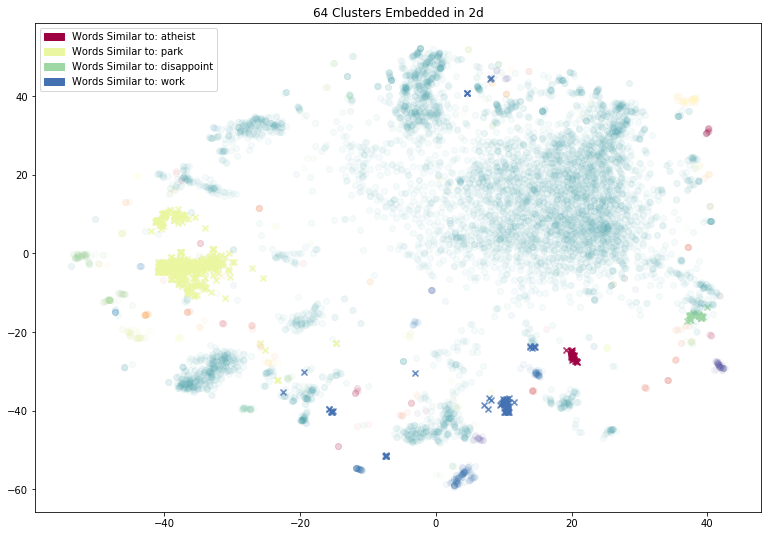

In [243]:
plot_embedded_clusters(dim_red, clustered_wv_df.labels_, legend=[1, 8, 12, 32])

In [245]:
wv_df[clustered_wv_df.labels_ == 1].head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
disappoint,-0.235032,-1.696048,-0.039209,-1.006235,-0.968943,0.117551,2.012763,-1.500448,0.371111,-0.103024,...,-1.867966,0.366410,-1.687534,1.776099,-0.001948,-0.942753,-0.323758,0.418799,0.703646,0.675984
annoy,-0.509595,-0.234477,-0.105023,0.782759,-0.494718,1.529665,0.613385,-2.956682,1.914651,1.837232,...,0.357051,-0.184894,-0.765359,0.194613,-0.089562,-0.790999,-0.715266,1.710391,-0.664831,0.446600
sad,-1.898635,-1.546651,-2.232050,-1.308777,-2.300616,-1.701346,1.833377,-2.087411,3.237246,1.261848,...,-2.272781,-0.856920,-1.243649,1.936533,-1.742093,-2.664801,-1.754375,-0.204359,-0.364142,2.144544
upset,-2.267228,-1.130764,-0.789428,-0.307305,-1.913559,-1.307800,1.678527,-2.597203,1.749868,-0.047062,...,-1.734596,0.064607,-2.011217,0.364249,-1.385140,-1.366344,-0.929015,0.583783,-0.106717,0.374008
depress,-1.098669,-1.022491,-1.353772,-2.082869,-1.199755,-0.110646,1.156238,-0.887470,2.172702,0.714289,...,-0.327113,-0.025306,-0.187666,0.595404,0.282716,-2.097348,-0.750469,0.707328,-0.702710,1.245831


# The Data

<center><img src="./images/twitter_logo.png"></center>

# Sentiment140

Twitter sentiment dataset

# My Approach

Logistic Regression with Bag of Words

Neural Network with Word Embeddings

# Logistic Regression

\begin{eqnarray}
g(X) &=& \alpha + \beta_0 X_0 + \cdots + \beta_n X_N \\
F(X) &=& \frac{1}{1 + e^{-g(X)}}
\end{eqnarray}

Friendly, familiar linear model

Easy to interpret and understand

# Logistic Regression Coefficients

<center>
<img src="./images/logistic_regression_coefficients.png" alt="logistic_regression_coefficients" style="width:800px;"/>
</center>

# Results

<img src="./images/is_logistic_model.png" alt="Logistic Regression Accuracy" style="width: 800px;"/>

<img src="./images/oos_logistic_model.png" alt="Logistic Regression Accuracy" style="width: 800px;"/>

# Neural Networks

<center>
<img src="./images/basic_neural_network.png" alt="Neural Network" style="width: 400px;"/>
</center>

# Neural Networks

<center>
<img src="./images/neural_network.png" alt="Neural Network" style="width: 400px;"/>
</center>

# Recurrent Neural Networks

<center>
<img src="./images/recurrent_neural_network.png" alt="Recurrent Neural Network" style="width: 400px;"/>
</center>

# Recurrent Neural Networks

Recurrent neural networks good for text processing

View sentences as sequences of words (similar to time series structure)

# Long Short-term Memory Networks

<center>
<img src="./images/lstm.svg" alt="Long Short-term Memory Network" style="width: 800px;"/>
</center>

# Long Short-term Memory Networks

In Keras this is simple to implement

In [ ]:
input_layer = Input(shape=(MAX_WORDS,))
embedding_layer = Embedding(max_features+1,
                            embedding_dim,
                            input_length=MAX_WORDS)(input_layer)
lstm_layer = LSTM(64,
                  dropout=DROPOUT,
                  activation='tanh',
                  return_sequences=True)(embedding_layer)
lstm_layer = LSTM(128,
                  dropout=DROPOUT,
                  activation='tanh')(lstm_layer)
output = Dense(1,
               activation='sigmoid',
               name='sentiment')(lstm_layer)

# Results

<center>
<img src="./images/nn_training.png" alt="Neural Network Training" style="width: 800px;"/>
</center>

<center>
<img src="./images/presidential_seal.png" alt="USA" style="width: 400px;"/>
</center>

# How to Compute A Signal?

Hypothesis: POTUS's tweets affect the market

# Precedent

Trump2Cash: https://github.com/maxbbraun/trump2cash
* Waits for the president to mention publicly-traded companies
* Uses sentiment analysis to determine positivity or negativity
* Enters long or short positions based on sentiment

BOTUS: https://twitter.com/botus
* Waits for the president to mention publicly-traded companies
* Uses sentiment analysis to determine positivity or negativity
* Enters long or short positions based on sentiment

Trump & Dump: https://www.t-3.com/work/the-trump-and-dump-bot-analyze-tweets-short-stocks-save-puppies-all-in-seconds
* Waits for the president to mention publicly-traded companies
* Uses sentiment analysis to determine positivity or negativity
* Enters short positions based if sentiment is negative

# Factor Models

CAPM

$$ r_p = \alpha + \beta_{m} r_{m} $$

Fama-French Factors

$$ r_p = \alpha + \beta_{m} r_{m} + \beta_{hml} r_{hml} + \beta_{smb} r_{smb} $$

Alternative Factors

$$ r_p = \alpha + \beta_0 r_0 + \cdots + \beta_n r_n $$

# Risk Modeling

<img src="./images/risk_modeling.png" alt="Risk Modeling" style="width: 800px;"/>

# Cross-sectional Equity Portfolios

<img src="./images/long_short_equity_toy_example.png" alt="Mean Return Buckets" style="width: 800px;"/>

## Average Sentiment Each Day

<img src="./images/daily_trump_sentiment.png" alt="Sentiment Score" style="width: 800px;"/>

## Sentiment Exposure Signal

<img src="./images/returns_buckets_trump.png" alt="Mean Return Buckets" style="width: 800px;"/>

## Sentiment Exposure Signal

<img src="./images/cumulative_return_trump.png" alt="Cumulative Returns" style="width: 800px;"/>

## Sentiment Exposure Signal

<img src="./images/cumulative_return_quantiles_trump.png" alt="Cumulative Return Buckets" style="width: 800px;"/>

## Performance Attribution

<img src="./images/risk_exposures_trump.png" alt="Risk Exposures" style="width: 800px;"/>

## Performance Attribution

<center>
<img src="./images/summary_stats_trump.png" alt="Common and Specific Returns" style="width: 250px;"/>
</center>

## Performance Attribution

<img src="./images/returns_decomp_trump.png" alt="Common and Specific Returns" style="width: 800px;"/>

## Possible Improvements

### Sentiment Model
* Lemmatization instead of Stemming
* Sense2Vec

### The Signal
* Change of maximum character count in tweets
* More sophisticated factor than beta exposure to sentiment
* Perhaps using it as a pure risk factor rather than an alpha factor

## Tools

* Natural Language Toolkit (NLTK): http://www.nltk.org/
* scikit-learn: https://github.com/scikit-learn/scikit-learn
* Gensim: https://github.com/RaRe-Technologies/gensim
* Keras: https://github.com/fchollet/keras
* Alphalens: https://github.com/quantopian/alphalens
* Pyfolio: https://github.com/quantopian/pyfolio


* Quantopian Lecture Series: https://quantopian.com/lectures
* Quantopian Research: https://quantopian.com/research

## References

* Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.
    * http://www.sentiment140.com/

<div style="text-align:center">
    <center><img src="./images/twitter_logo.png" alt='Twitter' style="width: 50px;"/></center>
    <h3>@clean_utensils</h3>
</div>

<div style="text-align:center">
    <center><img src="./images/github_logo.png" alt="Github" style="width: 50px;"/></center>
    <h3>@mmargenot</h3>
</div>

<div style="text-align:center">
    <center><img src="./images/logo-q-press-logo-red.png" alt="Quantopian" style="width: 100px;"/></center>
    <h3>max@quantopian.com</h3>
</div>

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*

In [4]:
!jupyter nbconvert --to slides ./Buying_Happiness_Talk.ipynb --reveal-prefix ./reveal.js

[NbConvertApp] Converting notebook ./Buying_Happiness_Talk.ipynb to slides
[NbConvertApp] Writing 540146 bytes to ./Buying_Happiness_Talk.slides.html
